## Bank Customer Churn Prediction





### Project description

In this project, I will use supervised machine learning models to identify customers who will churn in the future. The source of data come from the provide link.


https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers


# Part 0: Import Data from mounted google drive


In [1]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
id = "1He_bwTIHiP7JW0JyXc1Qpn3s7SlrEQEC"

file = drive.CreateFile({'id':id})
file.GetContentFile('bank_churn_data.csv')

In [6]:
import numpy as np
import pandas as pd

churn_df = pd.read_csv('bank_churn_data.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Part 1: Exploratory Data Anlysis


### Part 1.1: Raw Dataset

In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn_df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [9]:
# Extract dependent variable
y = churn_df['Exited']

### Part 1.2:  features analysis

In [10]:
# Check missing values
churn_df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [12]:
# understand Numerical feature
  # 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts' 'Balance', 'EstimatedSalary'

churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

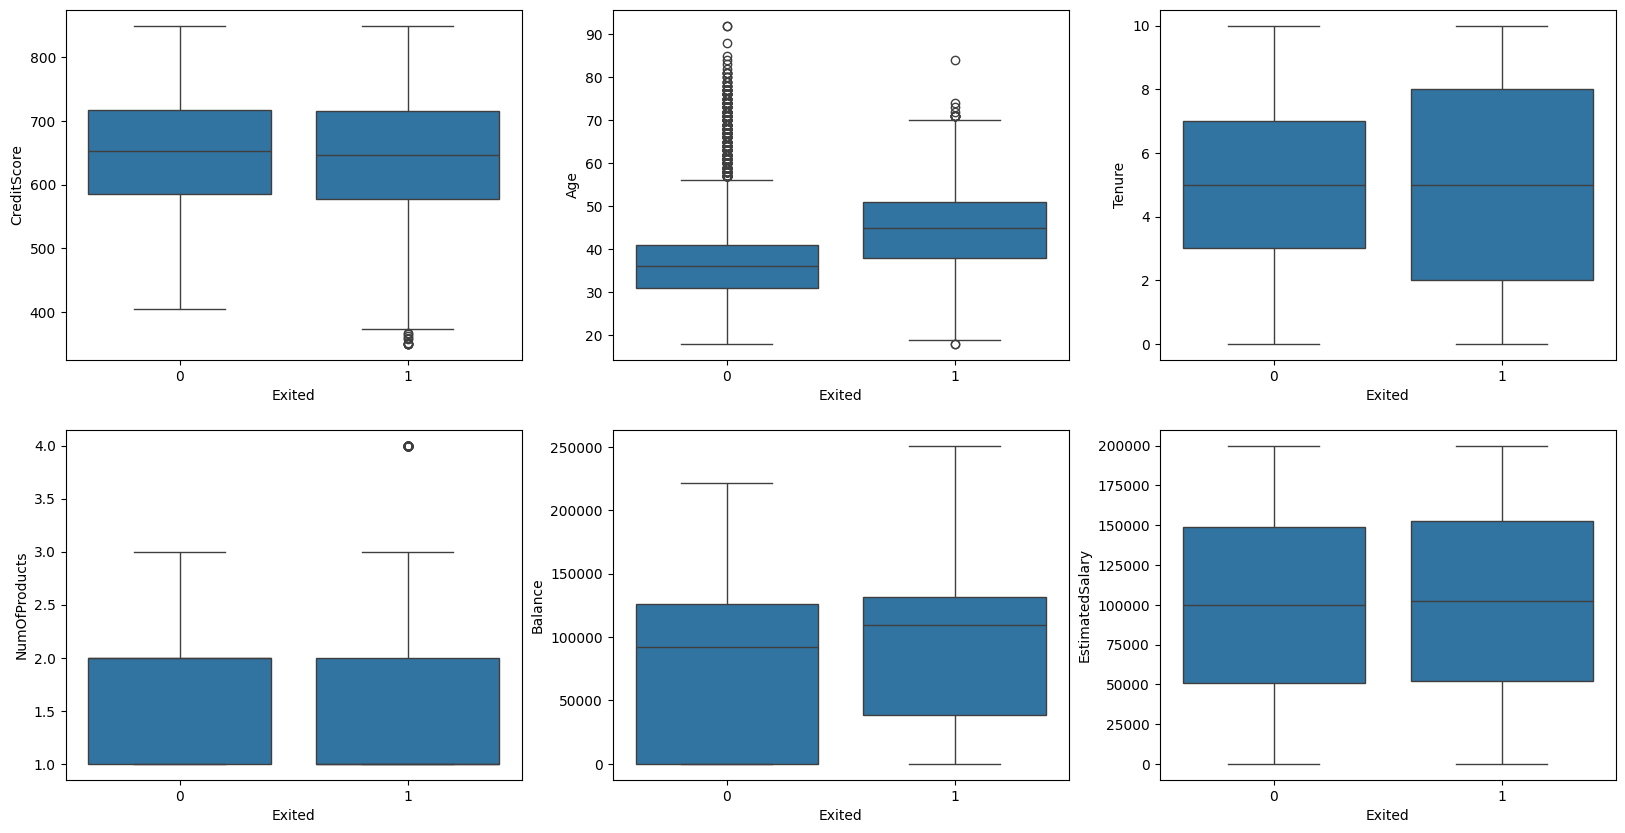

In [19]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

<Axes: xlabel='Exited', ylabel='count'>

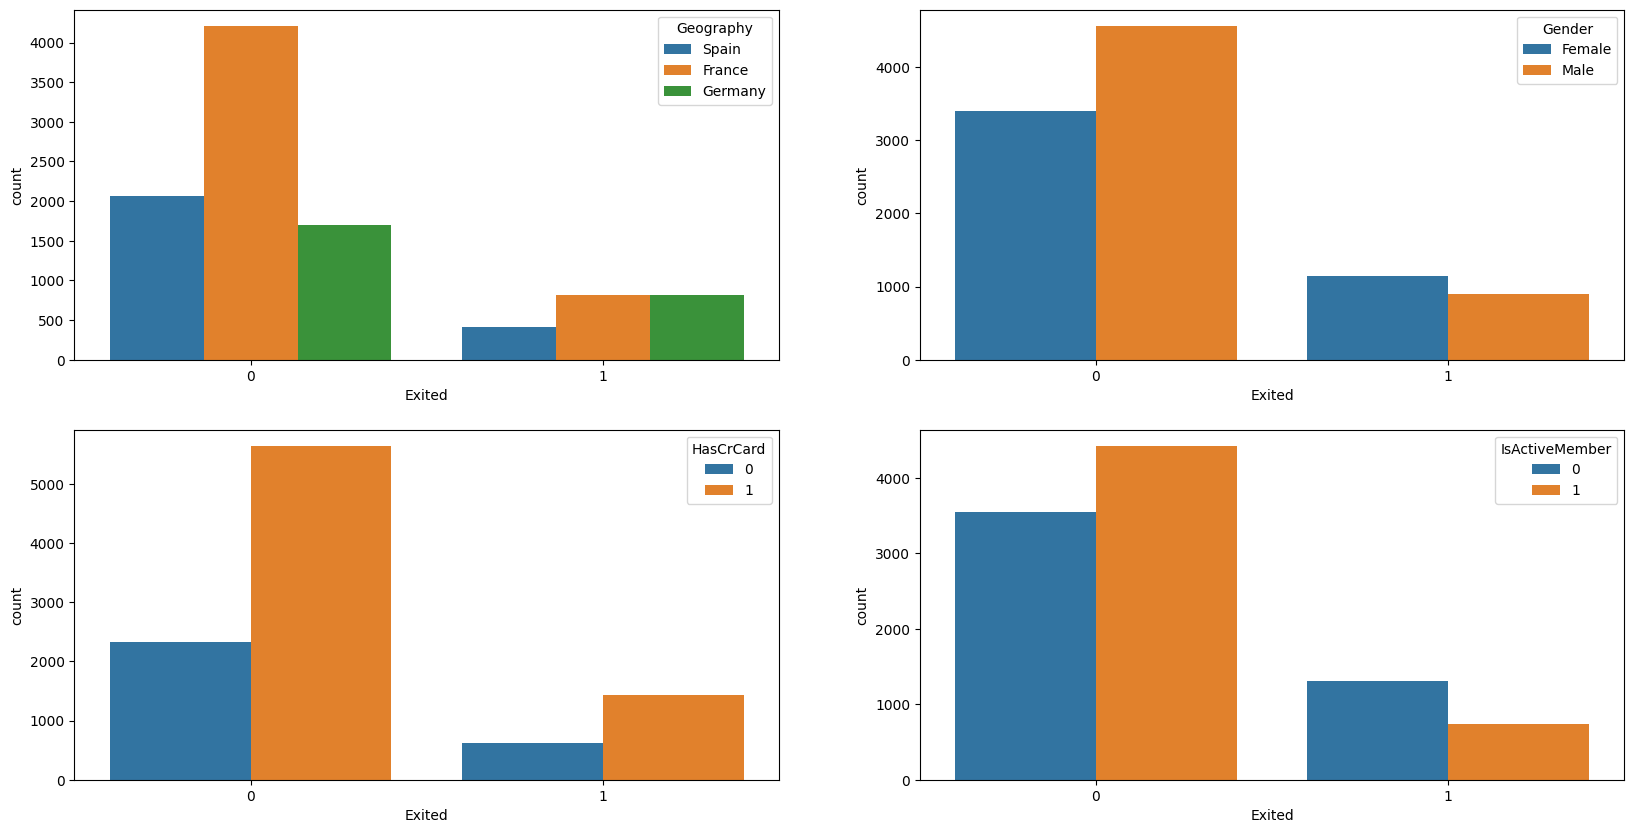

In [22]:
# categorical feature
  # 'Geography', 'Gender' 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

# Part 2: Feature Engineering

In [23]:
# Drop features not useful for modeling
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis = 1)

In [24]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [26]:
# check data type to cast
X.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [28]:
categorical_cols = X.columns[X.dtypes == 'object']
numerical_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [30]:
categorical_cols

Index(['Geography', 'Gender'], dtype='object')

In [31]:
numerical_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

Split dataset note imbalance between classes

In [44]:
y[y == 1].count()

2037

In [45]:
y[y == 0].count()

7963

In [51]:
# Splite data into training and testing with stratified sampling
from sklearn import model_selection


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state = 15)

print('training data has ' + str(X_train.shape[0]) + ' o|bservation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 o|bservation with 10 features
test data has 2500 observation with 10 features


Notes for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding); Encoding notes [encoding](http://contrib.scikit-learn.org/category_encoders/).

In [52]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2055,469,Germany,Male,38,9,113599.42,1,0,0,11950.29
2164,767,Spain,Male,77,8,149083.70,1,1,1,190146.83
7029,594,France,Female,53,4,0.00,1,1,0,5408.74
8235,564,Spain,Male,37,9,100252.18,1,1,1,146033.52
2703,459,Germany,Male,46,7,110356.42,1,1,0,4969.13


In [53]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography', 'Gender']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [54]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,469,38,9,113599.42,1,0,0,11950.29,0.0,1.0,0.0,0.0,1.0
1,767,77,8,149083.70,1,1,1,190146.83,0.0,0.0,1.0,0.0,1.0
2,594,53,4,0.00,1,1,0,5408.74,1.0,0.0,0.0,1.0,0.0
3,564,37,9,100252.18,1,1,1,146033.52,0.0,0.0,1.0,0.0,1.0
4,459,46,7,110356.42,1,1,0,4969.13,0.0,1.0,0.0,0.0,1.0


In [50]:
# Ordinal encoding
'''
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])
'''

In [55]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,469,38,9,113599.42,1,0,0,11950.29,0.0,1.0,0.0,0.0,1.0
1,767,77,8,149083.70,1,1,1,190146.83,0.0,0.0,1.0,0.0,1.0
2,594,53,4,0.00,1,1,0,5408.74,1.0,0.0,0.0,1.0,0.0
3,564,37,9,100252.18,1,1,1,146033.52,0.0,0.0,1.0,0.0,1.0
4,459,46,7,110356.42,1,1,0,4969.13,0.0,1.0,0.0,0.0,1.0


Standardize/Normalize Data

In [60]:
# Standardize input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])

X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [61]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.885904,-0.099105,1.377923,0.593696,-0.90841,-1.550130,-1.031702,-1.542138,0.0,1.0,0.0,0.0,1.0
1,1.209904,3.611164,1.032441,1.163094,-0.90841,0.645107,0.969272,1.556364,0.0,0.0,1.0,0.0,1.0
2,-0.587327,1.327921,-0.349490,-1.229175,-0.90841,0.645107,-1.031702,-1.655883,1.0,0.0,0.0,1.0,0.0
3,-0.898985,-0.194241,1.377923,0.379520,-0.90841,0.645107,0.969272,0.789317,0.0,0.0,1.0,0.0,1.0
4,-1.989790,0.661976,0.686958,0.541657,-0.90841,0.645107,-1.031702,-1.663527,0.0,1.0,0.0,0.0,1.0


# Part 3: Model Training and Evaluation

### Part 3.1: Model Training

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [65]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [66]:
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
classifier_logistic.score(X_test, y_test)

0.8116

### Part 3.2: Use Grid Search to Find Optimal Hyperparameters
alternative: random search

In [68]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.2.1: Find Optimal Hyperparameters - LogisticRegression

In [69]:
#tune here
parameters = {
    'penalty':('l2','l1'),
    'C':(0.01, 0.05, 0.1, 0.2, 1)# C = 1/lambda
}

Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = 5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [70]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8108000000000001
Best parameters set:
C:0.1
penalty:l2


In [71]:
best_LR_model = Grid_LR.best_estimator_

In [72]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
best_LR_model.score(X_test, y_test)

0.8124

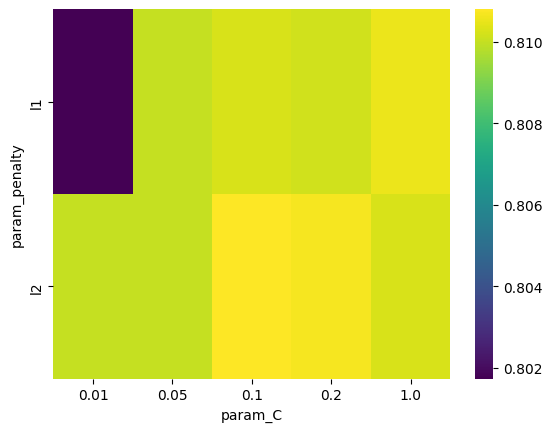

In [74]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score'))
_ = sns.heatmap(res, cmap='viridis')

#### Part 3.2.2: Find Optimal Hyperparameters: KNN

In [75]:
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [76]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.8402666666666667
Best parameters set:
n_neighbors:9


In [77]:
best_KNN_model = Grid_KNN.best_estimator_

In [78]:
best_KNN_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
best_KNN_model.score(X_test, y_test)

0.8372

#### Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [80]:
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [81]:
print_grid_search_metrics(Grid_RF)

Best score: 0.8596
Best parameters set:
max_depth:10
n_estimators:100


In [82]:
best_RF_model = Grid_RF.best_estimator_

In [83]:
best_RF_model

RandomForestClassifier(max_depth=10)

In [84]:
best_RF_model.score(X_test, y_test)

0.8652

####Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

Precision: tp / (tp + fp)

Recall: tp / (tp + fn)

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [86]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8652
precision is: 0.8138686131386861
recall is: 0.4381139489194499

Logistic Regression
Accuracy is: 0.8124
precision is: 0.6162790697674418
recall is: 0.2082514734774067

K nearest neighbor
Accuracy is: 0.8372
precision is: 0.6861313868613139
recall is: 0.3693516699410609



### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function

#### Part 3.4.1: ROC of RF Model

In [87]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [88]:
best_RF_model.predict_proba(X_test)

array([[0.8665197 , 0.1334803 ],
       [0.92081953, 0.07918047],
       [0.98733963, 0.01266037],
       ...,
       [0.65489474, 0.34510526],
       [0.96988436, 0.03011564],
       [0.98740089, 0.01259911]])

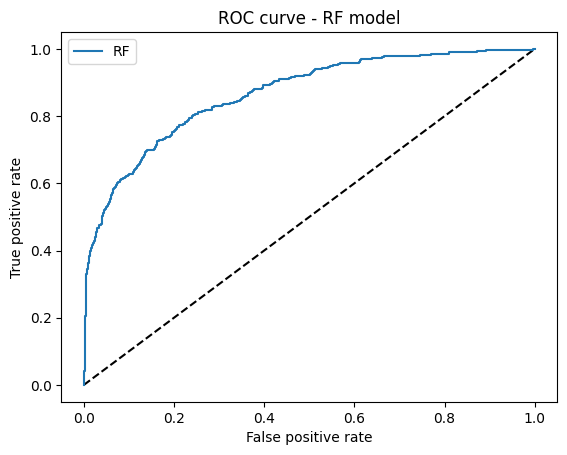

In [89]:
# ROC curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [90]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8655008441720552

#### Part 3.4.1: ROC of LR Model

In [91]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [92]:
best_LR_model.predict_proba(X_test)

array([[0.94678392, 0.05321608],
       [0.86752069, 0.13247931],
       [0.97525072, 0.02474928],
       ...,
       [0.79582977, 0.20417023],
       [0.9274133 , 0.0725867 ],
       [0.97212409, 0.02787591]])

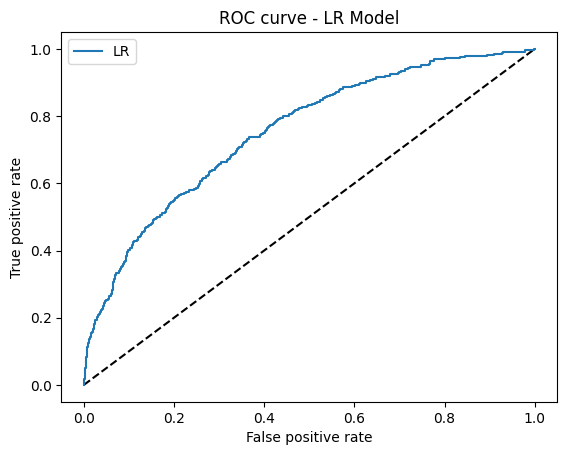

In [93]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [94]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7525761802373944

# Part 4: Model Extra Functionality

### Part 4.1:  Logistic Regression Model

The corelated features that we are interested in

In [97]:
X_with_corr = X.copy()

X_with_corr = OneHotEncoding(X_with_corr, enc_ohe, ['Geography', 'Gender'])
#X_with_corr['Gender'] = enc_ohe.transform(X_with_corr[['Gender']])
X_with_corr['SalaryInRMB'] = X_with_corr['EstimatedSalary'] * 6.4
X_with_corr.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,SalaryInRMB
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0,648632.832
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0,720272.512
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0,729162.048
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0,600490.432
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0,506138.240


In [98]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.04, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7307
IsActiveMember : -0.5046
Geography_Germany : 0.3121
Gender_Male : -0.1645
Balance : 0.1509
Gender_Female : 0.0764
CreditScore : -0.0457
NumOfProducts : -0.0439
Tenure : -0.0271
EstimatedSalary : 0.0049
SalaryInRMB : 0.0043
Geography_France : -0.0043
HasCrCard : -0.0022
Geography_Spain : 0.0


In [99]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Geography_Germany : 0.2279
Balance : 0.162
Gender_Male : -0.13
Gender_Female : 0.13
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
SalaryInRMB : 0.0137
EstimatedSalary : 0.0137


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [100]:
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography', 'Gender'])
#X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,1.0,0.0


In [101]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2403
EstimatedSalary : 0.1457
CreditScore : 0.1436
Balance : 0.1419
NumOfProducts : 0.1267
Tenure : 0.0852
IsActiveMember : 0.0398
Geography_Germany : 0.0212
HasCrCard : 0.0182
Geography_France : 0.01
